In [1]:
%pylab inline
import jax
import jax.numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
from nsec.datasets.two_moons import get_two_moons
import jax.numpy as jnp
import tensorflow_probability as tfp; tfp = tfp.experimental.substrates.jax

In [3]:
dist = get_two_moons(0.1)

/home/francois/.local/lib/python3.8/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [4]:
from nsec.langevin import UncalibratedLangevin, MetropolisAdjustedLangevinAlgorithm

In [34]:
samples, is_accepted = tfp.mcmc.sample_chain(
      num_results=1000,
      current_state=np.zeros([2]),
      kernel=MetropolisAdjustedLangevinAlgorithm(
          target_log_prob_fn=dist.log_prob,
          step_size=0.001),
      num_burnin_steps=1,
      trace_fn=lambda _, pkr: pkr.is_accepted, 
      seed=jax.random.PRNGKey(42))

/home/francois/.local/lib/python3.8/site-packages/tensorflow_probability/python/mcmc/_jax/sample.py:314: UserWarning: supplied `TransitionKernel` is not calibrated. Markov chain may not converge to intended target distribution.
  warnings.warn('supplied `TransitionKernel` is not calibrated. Markov '
/home/francois/.local/lib/python3.8/site-packages/tensorflow_probability/python/mcmc/_jax/sample.py:338: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


Traced<ShapedArray(float32[2,2]):JaxprTrace(level=1/0)> Traced<ShapedArray(float32[2]):JaxprTrace(level=1/0)>
Traced<ShapedArray(float32[2,2]):JaxprTrace(level=1/0)> Traced<ShapedArray(float32[2]):JaxprTrace(level=1/0)>


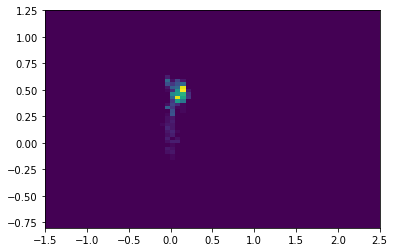

In [35]:
hist2d(samples[:,0], samples[:,1],64,range=[[-1.5,2.5],[-0.8,1.25]]);

In [24]:
samps = dist.sample(10000, seed=jax.random.PRNGKey(12))

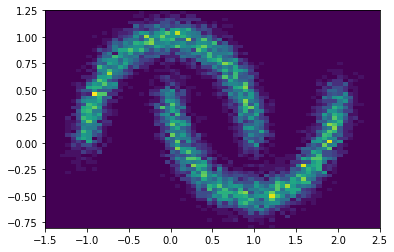

In [27]:
hist2d(samps[:,0], samps[:,1],64,range=[[-1.5,2.5],[-0.8,1.25]]);

In [8]:
samples, is_accepted = tfp.mcmc.sample_chain(
      num_results=10000,
      current_state=np.zeros([2]),
      kernel=tfp.mcmc.MetropolisAdjustedLangevinAlgorithm(
          target_log_prob_fn=dist.log_prob,
          step_size=0.1),
      num_burnin_steps=100,
      trace_fn=lambda _, pkr: pkr.is_accepted, 
      seed=jax.random.PRNGKey(42))